# **a) K-Means Clustering from Scratch**

**Steps to perform k-means clustering:**

Step 1. Randomly pick k data points as our initial Centroids.

Step 2. Find the distance (Euclidean distance for our purpose) between each data points in our training set with the k centroids.

Step 3. Now assign each data point to the closest centroid according to the distance found.

Step 4. Update centroid location by taking the average of the points in each cluster group.

Step 5. Repeat the Steps 2 to 4 till our centroids don’t change.

For optimal value of K (Number of Clusters), methods like the The Elbow method is used.


#Import libraries


In [3]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Function to implement k-means clustering

In [4]:

def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points

This function return an array of cluster labels for each data point in the training set.

# Apply the above function to digits dataset (in-built sklearn dataset).

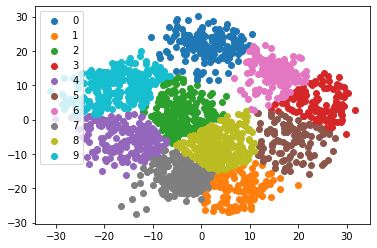

In [5]:
#Load Data
data = load_digits().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
 
#Applying our function
label = kmeans(df, 10, 1000)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

The output looks good.

# Apply k-means clustering from sklearn

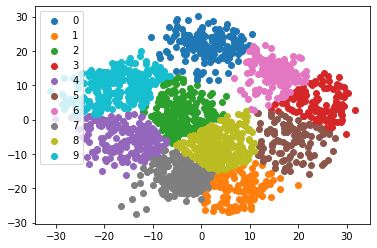

In [10]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(label.reshape(-1, 1))

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()